# Project: Investigate a Dataset - [TMDb Movie Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.
<br>  I'm here to analyis it & find more informations about it.



### Question(s) for Analysis
<br> ● Movies Profits [highest - lowest]
<br> ● Movies bugdets [highest - lowest]
<br> ● Relationship between profits & budegt
<br> ● Most to least profitable genres


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('tmdb-movies.csv')


In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#finding information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#finding the null values so we can fill them or clean them in the next step
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
<br> First: filling the null values


In [8]:
# Filling the null values
df_a=df.fillna(0)

<br> Second: Finding the duplicated ros


In [9]:
# Finding the duplicated rows
sum(df_a.duplicated())

1

<br> Third: Deleting the duplicated rows


In [10]:
# Deleting the duplicated rows
df_a.drop_duplicates(inplace=True)
df_a.shape

(10865, 21)

<br> Fourth: Converting the release_date column to DateTime


In [11]:
# Converting the release_date column to DateTime
df.release_date = pd.to_datetime(df['release_date'])
# Lets look at the new dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<br> Fifth: Droping the rows which contains NAN

In [40]:
# Droping the rows which contains NAN
columns = ['budget','revenue']
df[columns] = df[columns].replace(0, np.NaN)
df.dropna(subset = columns, inplace = True)
df.shape

(3855, 22)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Movies Profits [highest - lowest])

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df['profit'] = df['revenue'] - df['budget']

In [50]:
# getting the highest profit movie
df.loc[df['profit'].idxmax()]

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

This shows that the highest profit movie is:
<br>Avatar
<br>The profits:
<br>2,544,505,847 (2.54B) 
<br>Genre:
<br>Action|Adventure|Fantasy|Science Fiction

In [51]:
# getting the lowest profit movie
df.loc[df['profit'].idxmin()]

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

This shows that the lowest profit movie is:
<br>The Warrior's Way
<br>The profits:
<br>-413,912,431 
<br>Genre:
<br>Adventure|Fantasy|Action|Western|Thriller

### Research Question 2  (Movies bugdets [highest - lowest])

In [52]:
# getting the highest budget movie
df.loc[df['budget'].idxmax()]

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

This shows that the highest budget movie is:
<br>The Warrior's Way
<br>The budget:
<br>425,000,000 
    (compaired to the profits!!) 
<br>Genre:
<br>Adventure|Fantasy|Action|Western|Thriller

In [53]:
# getting the lowest budget movie
df.loc[df['budget'].idxmin()]

id                                                                  39964
imdb_id                                                         tt0120836
popularity                                                       0.090186
budget                                                                  1
revenue                                                               100
original_title                                               Lost & Found
cast                    David Spade|Sophie Marceau|Ever Carradine|Step...
homepage                                                              NaN
director                                                     Jeff Pollack
tagline                 A comedy about a guy who would do anything to ...
keywords                                     restaurant|neighbor|dog|ring
overview                A comedy about finding your true love at any p...
runtime                                                                95
genres                                

This shows that the lowest budget movie is:
<br>Lost & Found
<br>The budget:
<br>1 
    (only one dollar!!) 
<br>Genre:
<br>Comedy|Romance

### Research Question 3  (relationship between profit & budget)

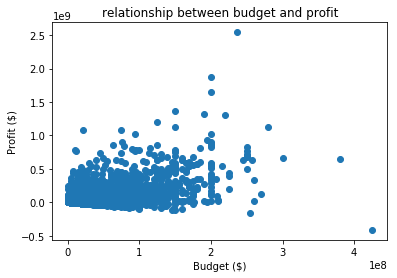

In [54]:
# x-axis
plt.xlabel('Budget ($)')
# y-axis
plt.ylabel('Profit ($)')
# Title of the histogram
plt.title('relationship between budget and profit')
plt.scatter(df['budget'], df['profit'])
plt.show()

This shows that there's no direct relationship between budget & profit but we can say that some movies with high budgets didn't make any/very small profits.

### Research Question 4 (Most to least profitable genres)


Drama              1757
Comedy             1358
Thriller           1205
Action             1086
Adventure           749
Romance             667
Crime               652
Science Fiction     520
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

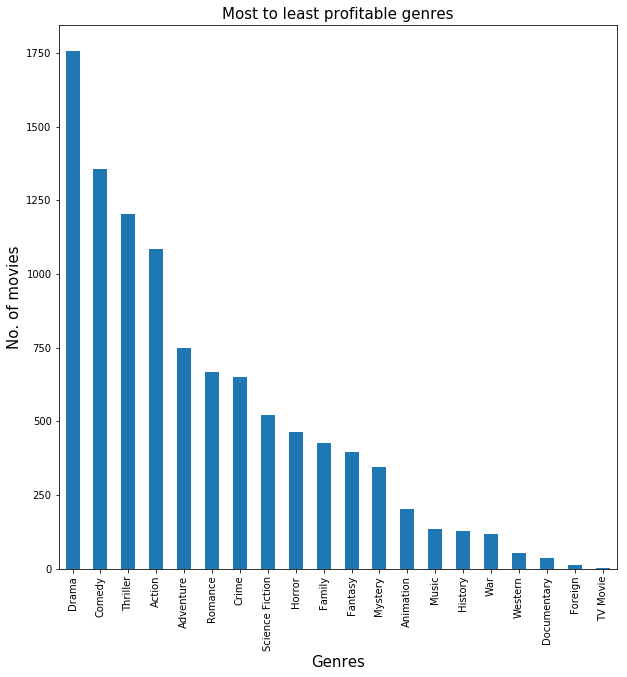

In [59]:
def Genres_count(genres_count):
    genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
    
    genres_count.plot(kind= 'bar', figsize=(10,10))
    #setup the title and the labels of the plot.
    plt.title("Most to least profitable genres",fontsize=15)
    plt.xlabel('Genres',fontsize=15)
    plt.ylabel("No. of movies",fontsize= 15)

    return genres_count
Genres_count(df['genres'])

counting the genres to know which one makes the msost profits.
<br> The plot shows that drama movies tend to make the most profits.

<a id='conclusions'></a>
## Conclusions

>The highest profit movie:
<br>Avatar
<br>The profits:
<br>2,544,505,847 (2.54B) 
<br>Genre:
<br>Action|Adventure|Fantasy|Science Fiction

>The lowest profit movie:
<br>The Warrior's Way
<br>The profits:
<br>-413,912,431 
<br>Genre:
<br>Adventure|Fantasy|Action|Western|Thriller

>The highest budget movie:
<br>The Warrior's Way
<br>The budget:
<br>425,000,000 
    (compaired to the profits!!) 
<br>Genre:
<br>Adventure|Fantasy|Action|Western|Thriller

>The lowest budget movie:
<br>Lost & Found
<br>The budget:
<br>1 
    (only one dollar!!) 
<br>Genre:
<br>Comedy|Romance

> There's no direct relationship between budget & profit, some movies didn't make that much of a profit but they did have a big budget, so this relationship isn't a sure thing.

> We can't know for sure but we can say that drama movies tend to make the higher profits.
### Limitations
<br> this calculations might have some error margin.

> Since we lost some data in the cleaning steps this conclusions might not be acccurate. 
<br> Also assuming that the currency of the profits & budget is in US dollar and it's not stated in the file might lead to some errors in the calculations.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0